In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import random
from sklearn.metrics import accuracy_score

# preparing dataset

data = pd.read_csv('data.csv')

X1 = data.iloc[:,0:7]
Y1 = data.iloc[:,7:8].values

X1 = (X1 - X1.mean())/X1.std()

# splitting into test set and training set with randomstate=0

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=0)

X=(x_train.values).T
X_test=(x_test.values).T

# one hot encoding the output

Y = np.zeros([3,X.shape[1]])
Y_test = np.zeros([3,X_test.shape[1]])

for i in range(Y.shape[1]):
    Y[y_train[i,0]-1,i]=1
for i in range(Y_test.shape[1]):
    Y_test[y_test[i,0]-1,i]=1

In [2]:
# hyperparameters
iters=200
alpha=0.01

In [3]:
# AUXILARY FUNCTIONS USED

def sigmoid(X):
    return 1/(1+np.exp(-X))

def sigmoid_der(X):
    return X*(1-X)

def softmax(X):
    W=np.exp(X)
    J=np.sum(W, axis=0)
    return W/J

def relu(X):
    return np.maximum(0,X)

def relu_der(X):
    return 1*(X > 0)

def createminibatch(X,Y):
    randomList = random.sample(range(0, X.shape[1]),32)
    X_mini=X[:,randomList[0]].reshape((7,1))
    Y_mini=Y[:,randomList[0]].reshape((3,1))
    for i in range(1,32):
        X_mini=np.concatenate((X_mini,X[:,randomList[i]].reshape((7,1))),axis=1)
        Y_mini=np.concatenate((Y_mini,Y[:,randomList[i]].reshape((3,1))),axis=1)
    return X_mini,Y_mini

def rand_weight_init(nx,ny):
    W=(np.random.rand(nx,ny)*2-1)
    return W

def costfunction(Y_soft,Y):
    W=-(np.log2(Y_soft))
    Z=W*Y
    return np.sum(Z)/(Y.shape[1])

#transforms the encoded probabilities into predicted values
def hot_decode(Y_pred):
    Yt_pred=[]
    for i in range(Y_pred.shape[1]):
        maxind=0
        for j in range(1,3):
            if Y_pred[j,i]>Y_pred[maxind,i]:
                maxind=j
        Yt_pred.append(maxind+1)
    return Yt_pred

# returns the accuracy score for a given value of parameters for NN1
def calc_acc_NN1(W1,B1,W2,B2,X,Y):
     # predicting values
    S1=np.dot(W1,X)+B1
    X1=sigmoid(S1)
    S2=np.dot(W2,X1)+B2
    Y_pred=softmax(S2)

    # converting hot-encoded values back into classes
    Yt_pred=hot_decode(Y_pred)
    Yt=hot_decode(Y)

    return accuracy_score(Yt_pred, Yt)

# returns the accuracy score for a given value of parameters for NN2
def calc_acc_NN2(W1,B1,W2,B2,W3,B3,X,Y):
     # predicting values
    S1=np.dot(W1,X)+B1
    X1=relu(S1)
    S2=np.dot(W2,X1)+B2
    X2=relu(S2)
    S3=np.dot(W3,X2)+B3
    Y_soft=softmax(S3)

    # converting hot-encoded values back into classes
    Yt_pred=hot_decode(Y_soft)
    Yt=hot_decode(Y)

    return accuracy_score(Yt_pred, Yt)

In [4]:
# NN Specification 1
def NN1(X,Y,X_test,Y_test):

    n0=7
    n1=32
    n2=3

    W1=rand_weight_init(n1,n0)
    B1=rand_weight_init(n1,1)
    W2=rand_weight_init(n2,n1)
    B2=rand_weight_init(n2,1)
    prevcost=100
    train_acc_NN1=[]
    test_acc_NN1=[]
    for i in range(iters):

    #     creating a minibatch
        X_mini,Y_mini=createminibatch(X,Y)
        m=X_mini.shape[1]

    #     forward propagation
        S1=np.dot(W1,X_mini)+B1
        X1=sigmoid(S1)
        S2=np.dot(W2,X1)+B2
        Y_soft=softmax(S2)

    #     calculate accuracy
        if i%10==0:
            train_acc_NN1.append(calc_acc_NN1(W1,B1,W2,B2,X,Y))
            test_acc_NN1.append(calc_acc_NN1(W1,B1,W2,B2,X_test,Y_test))
            
    #     back propagation
        dS2=(Y_soft-Y_mini)
        dW2=np.dot(dS2,X1.T)
        dB2=np.sum(dS2,axis=1,keepdims=True)
        dS1=(np.dot(W2.T,dS2))*(sigmoid_der(X1))
        dW1=np.dot(dS1,X_mini.T)
        dB1=np.sum(dS1,axis=1,keepdims=True)

    #     updating parameters
        W2=W2-dW2*alpha
        B2=B2-dB2*alpha
        W1=W1-dW1*alpha
        B1=B1-dB1*alpha
    
    plt.plot(np.arange(len(train_acc_NN1))*10,train_acc_NN1,label='training acc')
    plt.plot(np.arange(len(test_acc_NN1))*10,test_acc_NN1,label='test acc')
    plt.legend()


    #checking final traing accuracy
    print("final training accuracy: ",calc_acc_NN1(W1,B1,W2,B2,X,Y))
    
    #checking test final accuracy
    print("final test accuracy: ",calc_acc_NN1(W1,B1,W2,B2,X_test,Y_test))

final training accuracy:  0.9345238095238095
final test accuracy:  0.9523809523809523


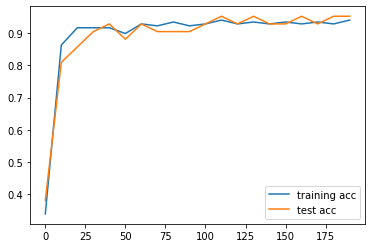

In [5]:
NN1(X,Y,X_test,Y_test)

In [6]:
# NN Specification 2
def NN2(X,Y,X_test,Y_test):


    n0=7
    n1=64
    n2=32
    n3=3

    W1=rand_weight_init(n1,n0)
    B1=rand_weight_init(n1,1)
    W2=rand_weight_init(n2,n1)
    B2=rand_weight_init(n2,1)
    W3=rand_weight_init(n3,n2)
    B3=rand_weight_init(n3,1)

    train_acc_NN2=[]
    test_acc_NN2=[]
    
    for i in range(iters):

    #     creating a minibatch
        X_mini,Y_mini=createminibatch(X,Y)
        m=X_mini.shape[1]

    #     forward propagation
        S1=np.dot(W1,X_mini)+B1
        X1=relu(S1)
        S2=np.dot(W2,X1)+B2
        X2=relu(S2)
        S3=np.dot(W3,X2)+B3
        Y_soft=softmax(S3)

    #     calculate cost
        if i%10==0:
            train_acc_NN2.append(calc_acc_NN2(W1,B1,W2,B2,W3,B3,X,Y))
            test_acc_NN2.append(calc_acc_NN2(W1,B1,W2,B2,W3,B3,X_test,Y_test))
            
        

    #     back propagation
        dS3=(Y_soft-Y_mini)
        dW3=np.dot(dS3,X2.T)
        dB3=np.sum(dS3,axis=1,keepdims=True)
        dS2=(np.dot(W3.T,dS3))*(relu_der(X2))
        dW2=np.dot(dS2,X1.T)
        dB2=np.sum(dS2,axis=1,keepdims=True)
        dS1=(np.dot(W2.T,dS2))*(relu_der(X1))
        dW1=np.dot(dS1,X_mini.T)
        dB1=np.sum(dS1,axis=1,keepdims=True)

    #     updating parameters
        W3=W3-dW3*alpha
        B3=B3-dB3*alpha                       
        W2=W2-dW2*alpha
        B2=B2-dB2*alpha
        W1=W1-dW1*alpha
        B1=B1-dB1*alpha
    
    plt.plot(np.arange(len(train_acc_NN2))*10,train_acc_NN2,label='training acc')
    plt.plot(np.arange(len(test_acc_NN2))*10,test_acc_NN2,label='test acc')
    plt.legend()

    #checking final accuracy
    print("final training accuracy: ",calc_acc_NN2(W1,B1,W2,B2,W3,B3,X,Y))
    print("final test accuracy: ",calc_acc_NN2(W1,B1,W2,B2,W3,B3,X_test,Y_test))

final training accuracy:  0.9940476190476191
final test accuracy:  0.9285714285714286


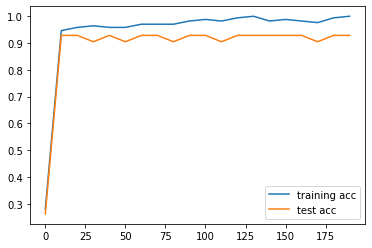

In [7]:
NN2(X,Y,X_test,Y_test)